In [1]:
#tfidf -> w2v

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk
import pickle

#specific to this notebook
import spacy
#!python -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load() 

import sklearn


pd.options.display.float_format = '{:.0f}'.format

In [3]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
#df = pd.read_csv(r'C:\Users\Jack\Desktop\proj\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
#df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['clean_text']), axis=1)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Hate'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


# TFIDF 

## Grid SVM

In [4]:
#create TFIDF matrix

tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [5]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(tfidf_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.457, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.4s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.802, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.809, total=   0.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.790, total=   0.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.8

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.781, total=   0.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.456, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.457, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.456, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.456, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.456, total=   1.0s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.651, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.615, total=   1.0s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.659, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.660, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.629, total=   0.9s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.567, total=   0.8s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.456, total=   0.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.802, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.809, total=   0.8s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.826, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.781, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.457, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.456, total=   0.8s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.516, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.505, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.493, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.510, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.493, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.499, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.521, total=   0.8s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.499, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.802, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.809, total=   0.7s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.790, total=   0.7s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.781, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.457, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.802, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.809, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.790, total=   0.7s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.826, total=   0.7s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.774, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.780, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.750, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.781, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.731, total=   0.9s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.516, total=   0.8s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.827, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.801, total=   1.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.799, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.786, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.820, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.499, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.827, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.846, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.810, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.827, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.827, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.804, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.456, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.457, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.826, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.827, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.801, total=   1.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.799, total=   1.2s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   2.0s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.704, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.827, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.846, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.810, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.827, total=   0.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.804, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.827, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.852, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.812, total=   1.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.822, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.138, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.826, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.827, total=   1.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.801, total=   1.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.799, total=   1.4s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.138, total=   1.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   1.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.138, total=   1.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.827, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.846, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.810, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.827, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.804, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.784, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.781, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.752, total=   0.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.786, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.815, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.803, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.803, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.824, total=   0.9s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.787, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.786, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.759, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.793, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.729, total=   0.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.457, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.456, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.456, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.456, total=   0.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.659, total=   0.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.635, total=   0.8s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.803, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.824, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.785, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.765, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.744, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.763, total=   0.7s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.787, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.786, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.759, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.793, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.729, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.710, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.742, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.738, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.709, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.457, total=   0.6s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.688, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.648, total=   0.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.515, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.523, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.499, total=   0.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.521, total=   0.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.787, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.786, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.759, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.793, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.729, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.802, total=   0.8s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.499, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.521, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.499, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.815, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.803, total=   0.9s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.803, total=   0.8s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.6s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.759, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.793, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.729, total=   0.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.754, total=   0.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.764, total=   0.8s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.827, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.846, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.810, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.827, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.804, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.839, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.828, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.807, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.840, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.780, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.799, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.777, total=   1.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.797, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.797, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.764, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.804, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.749, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.827, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.761, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.746, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.767, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.743, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.839, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.8

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   1.6s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.714, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.713, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.744, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.719, total=   1.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.797, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.764, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.804, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.749, total=   0.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.827, total=   0.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.699, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.715, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.726, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.698, total=   1.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.839, total=   1.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.8

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.138, total=   1.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.0s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.1s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.786, total=   0.8s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.772, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.742, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.793, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.706, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.801, total=   1.0s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.816, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.456, total=   0.4s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.791, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.800, total=   0.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.776, total=   0.8s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.456, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.706, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.760, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.772, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.742, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.793, total=   0.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.801, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.816, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.796, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.815, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.785, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.778, total=   0.7s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.776, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.809, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.770, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.811, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.811, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.793, total=   0.7s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   0.5s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.760, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.772, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.742, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.793, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.706, total=   

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.805, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.801, total=   0.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.832, total=   0.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.788, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.457, total=   0.7s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.805, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.762, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.457, total=   0.6s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   0.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.760, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.772, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.742, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.793, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.706, total=   0.7s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.748, total=   0.8s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.798, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.831, total=   0.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.789, total=   0.9s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.791, total=   1.2s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.800, total=   1.1s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.776, total=   1.0s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.499, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.516, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.505, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.746, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.766, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.816, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.808, total=   1.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.768, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.777, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.756, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.756, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.801, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.720, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.818, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.806, total=   1.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.457, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.138, total=   1.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.798, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.515, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.523, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.499, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.521, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.499, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.819, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.812, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.792, total=   1.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.804, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.789, total=   1.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.768, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.777, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.756, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.801, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.720, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.621, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.593, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.602, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.590, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.556, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.515, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.523, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.499, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.521, total=   1.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.499, total=   1.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.456, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.457, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.138, total=   2.0s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.768, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.777, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.756, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.801, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.720, total=   0.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.837, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.827, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.799, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.828, total=   0.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.795, total=   0.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 53.5min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [6]:
#print best score obtained and the parameters which obtained it
print('Macro F1 Score:', SVM_grid.best_score_)
print('Best Hyperparameters:', SVM_grid.best_params_)
print('Model object with best parameters: ')
print(SVM_grid.best_estimator_)

Macro F1 Score: 0.8258279786683275
Best Hyperparameters: {'C': 30, 'class_weight': 'balanced', 'coef0': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Model object with best parameters: 
SVC(C=30, class_weight='balanced', coef0=0.1, degree=1, gamma=0.01,
    random_state=12)


In [7]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(tfidf_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(tfidf_test)
print("complete.")

training...
complete.
predicting...
complete.


In [8]:
TFIDF_metrics = {}
SVM_default_precision = precision_score(y_test, SVM_test_preds)
SVM_default_recall = recall_score(y_test, SVM_test_preds)
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

TFIDF_metrics['Grid SVM'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.612
Recall: 0.747
Macro F1 Score: 0.801


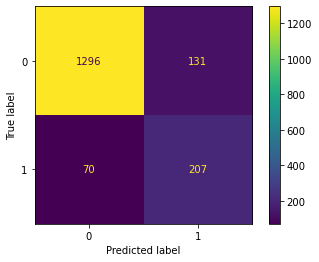

In [9]:
plot_confusion_matrix(SVM_grid.best_estimator_, tfidf_test, y_test)

## Grid LR

In [10]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
grid_LR.fit(tfidf_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t

[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=sag ......
[CV]  C=1, class_w

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.769, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.769, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.799, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.750, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.753, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.769, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.769, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.799, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.812, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.813, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.796, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.807, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.844, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.792, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.806, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.809, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.807, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.840, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.797, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.804, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.811, total=   0.0s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.793, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.731, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=Non

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.806, total=   1.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.795, total=   1.5s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.776, total=   1.5s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.833, total=   1.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.778, total=   1.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.806, total=   4.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.789, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.781, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.819, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.762, total=   4.8s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.774, total=   0.1s
[CV] C=10, class_weight=None, dual=False

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.832, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.833, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.796, total=   0.0s
[CV] C=10, class_weight=balanced, d

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.821, total=   1.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.834, total=   1.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.804, total=   1.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.828, total=   1.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.791, total=   1.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.818, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.833, total=   4.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.811, total=   4.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.832, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.779, total=   4.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.832, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.833, total=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.771, total=   2.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.781, total=   2.8s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.741, total=   2.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.805, total=   2.6s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.735, total=   2.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.762, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.762, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.730, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.790, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.702, total=   0.0s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.759, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.749, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.784, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.730, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.760, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.759, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.749, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.784, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.730, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.766, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.759, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.751, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver,

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.787, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.736, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.760, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.759, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.749, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.784, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_select


[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.781, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.828, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.814, total=   2.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.803, total=   2.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.773, total=   2.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.819, total=   2.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.764, total=   2.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.808, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.768, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.819, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.730, total=   6.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.816, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.817, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.826, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.775, total=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.816, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.817, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.826, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.816, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.817, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.828, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.814, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.815, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.830, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.816, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.817, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.781, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.828, total=   0.0s
[CV] C=30, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [11]:
# train classifier
print("training...")
grid_LR.best_estimator_.fit(tfidf_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_test_preds = grid_LR.best_estimator_.predict(tfidf_test)
print("complete.")

training...
complete.
predicting...
complete.


In [12]:
grid_LR_precision = precision_score(y_test, LR_test_preds)
grid_LR_recall = recall_score(y_test, LR_test_preds)
grid_LR_macro_f1_score = f1_score(y_test, LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_LR_precision))
print('Recall: {:.3}'.format(grid_LR_recall))
print('Macro F1 Score: {:.3}'.format(grid_LR_macro_f1_score))

TFIDF_metrics['Grid LR'] = {'precision': grid_LR_precision, 'recall': grid_LR_recall, 
                            'macro_f1': grid_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.66
Recall: 0.679
Macro F1 Score: 0.802


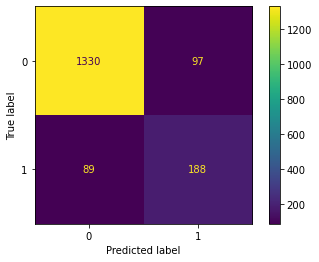

In [13]:
plot_confusion_matrix(grid_LR, tfidf_test, y_test)

## Grid NB

In [14]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(tfidf_train.toarray(), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.521, total=   1.1s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.590, total=   1.0s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.548, total=   1.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.546, total=   1.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.511, total=   1.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.404, total=   1.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.439, total=   1.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.419, total=   1.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.410, total=   1.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.434, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.436, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.431, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.437, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.395, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.458, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.455, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.577, total=   1.0s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.561, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.600, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.592, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.572, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.579, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.572, total=   1.0s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.628, total=   1.0s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.623, total=   1.0s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.603, total=   1.0s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.588, total=   1.1s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.612, total=   1.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.628, total=   1.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.620, total=   1.1s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.580, total=   1.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.612, total=   1.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.621, total=   1.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.613, total=   1.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.594, total=   1.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.580, total=   1.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.612, total=   1.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.610, total=   1.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.595, total=   1.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.573, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.612, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.622, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.610, total=   0.9s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.595, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.612, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.622, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.610, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.595, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.573, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.612, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.622, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.595, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.573, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.612, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.622, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.610, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.595, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.573, total=   1.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.622, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.610, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.595, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.573, total=   1.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.612, total=   1.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.622, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.610, total=   1.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.3min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [15]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(tfidf_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(tfidf_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [16]:
grid_NB_precision = precision_score(y_test, NB_test_preds)
grid_NB_recall = recall_score(y_test, NB_test_preds)
grid_NB_macro_f1_score = f1_score(y_test, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

TFIDF_metrics['Grid NB'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.314
Recall: 0.574
Macro F1 Score: 0.614


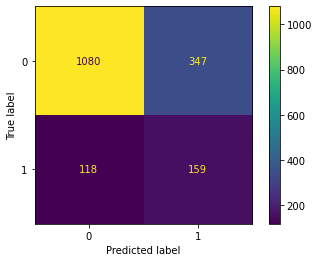

In [17]:
plot_confusion_matrix(grid_NB, tfidf_test.toarray(), y_test)

## Results

In [18]:
#compare parameters
TFIDF_results = pd.DataFrame.from_dict(TFIDF_metrics, orient='index')
TFIDF_results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\TFIDF_results.csv", index=True)

In [19]:
pd.options.display.float_format = '{:.4f}'.format
TFIDF_results

,precision,recall,macro_f1
Grid SVM,0.6124,0.7473,0.8006
Grid LR,0.6596,0.6787,0.8018
Grid NB,0.3142,0.5740,0.6145


## Word2Vec

In [20]:
pd.options.display.float_format = '{:.0f}'.format
#create a column of word vectors
def get_vec(x):
  doc = nlp(x)
  return doc.vector

df['Vector'] = df['clean_text_sl'].apply(lambda x: get_vec(x))

df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate,Vector
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0,"[0.08288886, 0.23560286, -0.18601228, -0.22729..."
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0,"[-0.061111078, 0.16252388, -0.29238623, 0.0590..."
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0,"[-0.037408248, 0.17537051, -0.26556823, -0.159..."
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0,"[-0.15938167, 0.12319001, 0.23837666, -0.27785..."
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0,"[-0.12933588, 0.07560309, -0.17432672, -0.0436..."


In [21]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(df['Vector'], df['Hate'], test_size=0.25, random_state=12)

X_train_w2v = X_train_w2v.to_numpy()
X_train_w2v = X_train_w2v.reshape(-1,1)
X_train_w2v = np.concatenate(np.concatenate(X_train_w2v,axis = 0),axis = 0).reshape(-1,300)

X_test_w2v = X_test_w2v.to_numpy()
X_test_w2v = X_test_w2v.reshape(-1,1)
X_test_w2v = np.concatenate(np.concatenate(X_test_w2v,axis = 0),axis = 0).reshape(-1,300)

X_test_w2v

array([[-2.1108501e-01,  1.2624250e-01, -4.3324998e-01, ...,
        -1.3868000e-02,  1.2104996e-02, -3.0276501e-01],
       [-2.9641632e-02,  6.7381456e-02, -1.5921815e-01, ...,
        -1.1818079e-02, -7.6878026e-02,  1.8777379e-01],
       [-1.1656000e-01, -1.3514499e-01, -2.1657000e-01, ...,
        -2.2762500e-01,  2.6967999e-01,  1.7077500e-01],
       ...,
       [-1.3511965e-01,  2.6482139e-02,  5.4256123e-02, ...,
         1.6896214e-02, -1.5000264e-01,  8.7739274e-02],
       [-5.5667001e-01,  3.8100281e-04, -2.7841499e-01, ...,
         4.0863328e-02, -5.5132335e-01,  7.2736986e-02],
       [-5.0197493e-02, -4.6337001e-02, -9.1661006e-02, ...,
         4.9198252e-01,  3.5889752e-02, -5.1670004e-02]], dtype=float32)

## Grid SVM

In [22]:
SVM_default = svm.SVC(C=1.0, kernel='rbf', gamma='scale', shrinking=True,
                      class_weight=None, random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'C': [1, 10, 30],  
              'gamma': ['auto', 0.1, 0.01], 
              'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
              'coef0': [0.1, 1, 3],
              'degree': [1, 3, 5],
              'class_weight': [None, 'balanced']}

# grid search with f1 being the performance metric
SVM_grid = GridSearchCV(SVM_default, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
SVM_grid.fit(X_train_w2v, y_train_w2v)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.654, total=   2.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.602, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.617, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.594, total=   2.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.596, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.572, total=   2.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.571, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.574, total=  

[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.625, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.614, total=   2.5s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.778, total=   2.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.756, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.749, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.7

[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.745, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.774, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.781, total=   2.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.767, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.778, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.757, total=   2.7s
[CV] C=1, class_

[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.800, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.778, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.763, total=   2.6s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.803, total=   2.7s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.772, total=   2.8s
[CV] C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=sigmoid, score=0.634, total=   2.3s
[CV] C=1, class_weigh

[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.516, total=   2.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.522, total=   2.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.504, total=   2.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=sigmoid, score=0.510, total=   2.8s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.778, total=   2.6s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=auto, kernel=linear, score=0.756, total=   2.7s


[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.757, total=   2.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=linear, score=0.745, total=   2.7s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.674, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.611, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.637, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly 
[CV]  C=1, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=poly, score=0.630, total=   2.4s
[CV] C=1, class_weight=

[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.749, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.683, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.703, total=   2.3s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.695, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=rbf, score=0.694, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.596, total=   2.8s
[CV] C=1, class_weight=None, coe

[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.580, total=   2.4s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.594, total=   2.3s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=sigmoid, score=0.566, total=   2.6s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.778, total=   3.1s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.756, total=   3.1s
[CV] C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=None, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.749, total=   3.1s
[CV] C=1, cla

[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=linear, score=0.745, total=   3.0s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.582, total=   2.8s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.571, total=   3.1s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.579, total=   3.2s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.557, total=   3.1s
[CV] C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.543, total=   3.1s
[CV] C=1, class_weight=None

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.602, total=   2.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.617, total=   2.4s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.594, total=   2.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.596, total=   2.5s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   3.0s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   2.8s
[CV] C=1, class_weight=N

[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   2.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.456, total=   2.9s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.778, total=   2.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.756, total=   2.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.749, total=   2.8s
[CV] C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=None, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.757, total=   2.9s
[CV]

[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.779, total=   3.5s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.747, total=   3.5s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.745, total=   3.3s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.746, total=   3.6s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.737, total=   3.4s
[CV] C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=1, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=rbf, score=0.749, total=   2.5s
[CV] C=1, class_weight=None, coef0=3, de

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.811, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.784, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.779, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.805, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid, score=0.555, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=sigmo

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.750, total=   6.5s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.774, total=   6.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.741, total=   6.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.765, total=   6.4s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.752, total=   6.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=sigmoid, score=0.760, total=   5.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.742, total=   4.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.758, total=   4.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.745, total=   4.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.744, total=   4.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degr

[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.744, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=linear, score=0.753, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.803, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.774, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.742, total=   3.1s
[CV] C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=p

[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.765, total=   6.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=poly, score=0.753, total=   6.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.781, total=   4.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.811, total=   4.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.784, total=   4.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.779, total=   4.2s
[

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.756, total=   4.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=rbf, score=0.777, total=   4.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.740, total=   6.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.767, total=   6.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.733, total=   6.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.767, total=   5.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=sigmoid, score=0.756, total=   5.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.742, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.758, total=   3.9s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear, score=0.745, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.744, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=linear, score=0.753, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.793, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.748, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.741, total=   3.1s
[CV] C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=poly, score=0.757, tota

[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.765, total=   5.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=poly, score=0.753, total=   5.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.781, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.811, total=   3.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.784, total=   3.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=rbf, score=0.779, total=   3.6s
[

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.756, total=   4.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=rbf, score=0.777, total=   4.9s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.456, total=   8.6s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.457, total=   8.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid, score=0.138, total=   8.5s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=

[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.680, total=   8.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=sigmoid, score=0.693, total=   9.1s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.742, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.758, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear, score=0.745, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=3, gamma=0.01, ke

[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.744, total=   3.8s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=linear, score=0.753, total=   3.7s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.778, total=   3.4s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.746, total=   3.3s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.731, total=   3.2s
[CV] C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly 
[CV]  C=1, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=poly, score=0.740, tota

[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.700, total=   2.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=auto, kernel=poly, score=0.701, total=   2.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.814, total=   2.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.800, total=   3.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.786, total=   2.9s
[CV] C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=rbf, score=0.787, total=   3.1s
[CV] C=10, c

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=rbf, score=0.735, total=   2.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.748, total=   2.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.678, total=   2.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.706, total=   2.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid, score=0.700, total=   2.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=sig

[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.764, total=   5.7s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.753, total=   5.5s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.755, total=   5.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.755, total=   5.4s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=linear, score=0.737, total=   5.3s
[CV] C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=3, gamma=0.01, kernel=poly, score

[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.778, total=   4.2s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.764, total=   3.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.761, total=   4.0s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.1, kernel=poly, score=0.751, total=   4.1s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.803, total=   2.8s
[CV] C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=rbf, score=0.772, total=   2.8s
[CV] C=

[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.786, total=   3.3s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.787, total=   3.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=rbf, score=0.790, total=   3.4s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.578, total=   2.0s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.565, total=   2.1s
[CV] C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=sigmoid, score=0.567, total=   2.1s
[CV] C=10, class

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=sigmoid, score=0.650, total=   2.9s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.764, total=   5.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.753, total=   5.8s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.755, total=   5.9s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.755, total=   6.0s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=auto, kernel=linear, score=0.737, total=   

[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.754, total=   2.5s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.752, total=   2.5s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.781, total=   2.6s
[CV] C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=1, degree=3, gamma=0.01, kernel=poly, score=0.764, total=   2.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.764, total=   2.5s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.718, total=   2.4s
[CV] C=10, class_weigh

[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.789, total=   2.5s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=rbf, score=0.765, total=   2.5s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.731, total=   2.8s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.679, total=   2.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.696, total=   2.7s
[CV] C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.709, total=   2.

[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.764, total=   5.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.753, total=   5.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.755, total=   5.7s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.755, total=   5.9s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.737, total=   5.8s
[CV] C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.778, total=   2.9s
[CV] C=10, 

[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.755, total=   3.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.767, total=   3.0s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.750, total=   3.2s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.814, total=   3.5s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.800, total=   3.5s
[CV] C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.786, total=   3.4s
[CV] C=10, class_weight=None, 

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.735, total=   2.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   3.0s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.457, total=   2.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   2.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, total=   2.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.456, tot

[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.753, total=   5.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.755, total=   5.7s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.755, total=   5.9s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.737, total=   5.5s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.771, total=   5.8s
[CV] C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly 
[CV]  C=10, class_weight=None, coef0=3, degree=5, gamma=0.01, kernel=poly, score=0.759, total=   5.9s
[CV]

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.742, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.758, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.745, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.744, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.753, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, ke

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.763, total=   6.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.823, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.794, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.779, total=   3.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.767, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=rbf,

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.779, total=   3.8s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.786, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.753, total=   4.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.794, total=   4.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.757, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0

[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.754, total=   3.9s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.767, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.769, total=   4.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.722, total=   7.3s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.750, total=   6.4s
[CV] C=10, class_weight=balanced, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, 

[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.750, total=   6.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.736, total=   6.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.734, total=   7.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=linear, score=0.745, total=   7.5s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.742, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.786, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.761, total=   4.2s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.761, total=   4.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=auto, kernel=poly, score=0.784, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.823, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.7

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.794, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.763, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.779, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=rbf, score=0.786, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.748, total=   4.4s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.780, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.755, total=   4.0s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.773, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=sigmoid, score=0.767, total=   4.1s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear, score=0.722, total=   6.3s
[CV] C=10, class_weight=balanced, coef0=1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=1, degree=5,

[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.750, total=   5.9s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.736, total=   5.7s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.734, total=   6.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=linear, score=0.745, total=   6.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly, score=0.742, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=1, gamma=0.1, kernel=poly

[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.770, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.751, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.743, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=auto, kernel=poly, score=0.764, total=   3.5s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.823, total=   3.2s
[CV] C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=rbf, score=0.7

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.794, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.763, total=   3.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.779, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=rbf, score=0.786, total=   3.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid, score=0.697, total=   7.4s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=sigmo

[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.745, total=   6.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.710, total=   6.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.763, total=   6.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=sigmoid, score=0.759, total=   6.6s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear, score=0.722, total=   6.3s
[CV] C=10, class_weight=balanced, coef0=3, degree=5, gamma=0.01, kernel=linear 
[CV]  C=10, class_weight=balanced, coef0=3, degree=5,

[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.755, total=  10.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.751, total=  11.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.753, total=   9.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=linear, score=0.743, total=  11.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.763, total=   2.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=1, gamma=0.1, kernel=poly, score=0.755, total= 

[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.587, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.562, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=auto, kernel=poly, score=0.564, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.804, total=   2.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.787, total=   2.9s
[CV] C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=3, gamma=0.1, kernel=rbf, score=0.775, total=   2.8s
[CV] C=3

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.784, total=   2.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=rbf, score=0.759, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.749, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.714, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, score=0.729, total=   2.2s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=auto, kernel=sigmoid, sc

[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=sigmoid, score=0.714, total=   2.1s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.763, total=  11.8s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.755, total=  10.5s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.751, total=  11.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, score=0.753, total=   9.7s
[CV] C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=None, coef0=0.1, degree=5, gamma=0.01, kernel=linear, 

[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.763, total=   2.9s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.755, total=   3.0s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.755, total=   2.9s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.761, total=   3.0s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.1, kernel=poly, score=0.743, total=   2.9s
[CV] C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=1, gamma=0.01, kernel=rbf, score=0.783, total=   2.2s
[CV] C=30, class_weight=None,

[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.775, total=   2.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.771, total=   2.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=rbf, score=0.785, total=   2.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.578, total=   1.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.565, total=   1.8s
[CV] C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=1, degree=3, gamma=0.1, kernel=sigmoid, score=0.564, total=   1.8s
[CV] C=30, class

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=sigmoid, score=0.707, total=   2.4s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.763, total=  11.8s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.755, total=  10.5s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.751, total=  11.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.753, total=   9.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=auto, kernel=linear, score=0.743, total=  1

[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.792, total=   2.7s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.769, total=   2.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.772, total=   2.6s
[CV] C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly 
[CV]  C=30, class_weight=None, coef0=1, degree=5, gamma=0.01, kernel=poly, score=0.759, total=   2.6s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.795, total=   2.1s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.757, total=   2.1s
[CV] C=30, class_weigh

[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.795, total=   2.2s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=rbf, score=0.774, total=   2.2s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.553, total=   2.5s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.544, total=   2.5s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.544, total=   2.5s
[CV] C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=None, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.548, total=   2.

[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.763, total=  11.8s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.755, total=  10.5s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.751, total=  11.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.753, total=   9.6s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.743, total=  11.1s
[CV] C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=3, gamma=0.1, kernel=poly, score=0.773, total=   3.4s
[CV] C=30, 

[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.775, total=   5.5s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.768, total=   5.7s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.742, total=   5.9s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.804, total=   2.8s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.787, total=   2.9s
[CV] C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=None, coef0=3, degree=5, gamma=0.1, kernel=rbf, score=0.775, total=   2.8s
[CV] C=30, class_weight=None, 

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=rbf, score=0.794, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.754, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.783, total=   3.6s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.759, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid, score=0.773, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced,

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.731, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=sigmoid, score=0.734, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.731, total=  10.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.753, total=  10.3s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear, score=0.728, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, co

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.728, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.727, total=  11.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=linear, score=0.741, total=  13.4s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.799, total=   2.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly, score=0.759, total=   2.9s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=3, gamm

[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.516, total=   6.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.516, total=   6.7s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.521, total=   6.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=auto, kernel=poly, score=0.505, total=   6.8s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.798, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=0.1, degree=5, gamma=0.1,

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.770, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.792, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.768, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.777, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=rbf, score=0.794, total=   3.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.698, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.755, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.708, total=   3.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.717, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=sigmoid, score=0.718, total=   3.5s
[CV] C=30, class_weight=balanced, coef0=1, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=

[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.731, total=  10.6s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.753, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.728, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.727, total=  11.9s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=linear, score=0.741, total=  13.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.763, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.791, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.767, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.751, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=auto, kernel=poly, score=0.783, total=   3.3s
[CV] C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=1, degree=5, gamma=0.1, kernel=rbf, score

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.770, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.792, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.768, total=   3.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.777, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=rbf, score=0.794, total=   3.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=auto, kernel=sigmoid, scor

[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.741, total=   5.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.768, total=   5.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.737, total=   5.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.770, total=   5.7s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid 
[CV]  C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=sigmoid, score=0.756, total=   5.8s
[CV] C=30, class_weight=balanced, coef0=3, degree=1, gamma=0.01, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=

[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.731, total=  10.6s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.753, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.728, total=  10.4s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.727, total=  11.9s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=linear, score=0.741, total=  13.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=3, gamma=0.1, kernel=

[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.781, total=   6.1s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.776, total=   6.5s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.746, total=   6.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.751, total=   6.2s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=auto, kernel=poly, score=0.750, total=   6.3s
[CV] C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf 
[CV]  C=30, class_weight=balanced, coef0=3, degree=5, gamma=0.1, kernel=rbf, score

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 233.5min finished


GridSearchCV(cv=5, estimator=SVC(random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'coef0': [0.1, 1, 3], 'degree': [1, 3, 5],
                         'gamma': ['auto', 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             scoring='f1_macro', verbose=3)

In [23]:
# train classifier
print("training...")
SVM_grid.best_estimator_.fit(X_train_w2v, y_train_w2v)
print("complete.")
# use classifier to predict on test set
print("predicting...")
SVM_test_preds = SVM_grid.best_estimator_.predict(X_test_w2v)
print("complete.")

training...
complete.
predicting...
complete.


In [24]:
w2v_metrics = {}
SVM_default_precision = precision_score(y_test, SVM_test_preds)
SVM_default_recall = recall_score(y_test, SVM_test_preds)
SVM_default_macro_f1_score = f1_score(y_test, SVM_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(SVM_default_precision))
print('Recall: {:.3}'.format(SVM_default_recall))
print('Macro F1 Score: {:.3}'.format(SVM_default_macro_f1_score))

w2v_metrics['Grid SVM'] = {'precision': SVM_default_precision, 'recall': SVM_default_recall, 
                              'macro_f1': SVM_default_macro_f1_score}

Model evaluation metrics
Precision: 0.709
Recall: 0.57
Macro F1 Score: 0.784


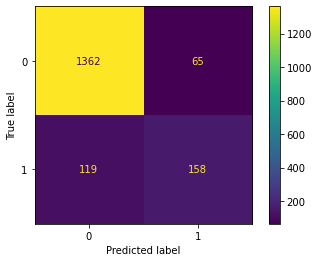

In [25]:
plot_confusion_matrix(SVM_grid, X_test_w2v, y_test_w2v)


## Grid LR

In [26]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
grid_LR.fit(X_train_w2v, y_train_w2v)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t

[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=sag .......
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=saga ......
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=saga ......
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=saga ......
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=saga ......
[CV]  C=1, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l2, solver=saga ......
[CV]  C=1, class_weight=None, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.764, total=   1.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.734, total=   1.8s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.730, total=   1.8s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.756, total=   1.9s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.747, total=   1.8s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.767, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.737, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.729, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.756, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.747, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l2, sol

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.764, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.737, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.740, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.752, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.745, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.764, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.737, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.740, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs ....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.752, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=lbfgs .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.764, total=   0.6s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.737, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.740, total=   0.6s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.752, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.745, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.764, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.737, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.740, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.752, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.745, total=   1.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.770, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.738, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.740, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.750, total=   0.2s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.747, total=   0.3s
[CV] C=1, class_weight=None, dual=False, penalty=elastic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga ..
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga ..
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga ..
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga ..
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga ..
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l1, solver=liblinear, score=nan, total=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver saga supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.762, total=   0.3s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.776, total=   0.3s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.748, total=   0.3s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.754, total=   0.3s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.757, total=   0.3s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=ela

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.760, total=   1.7s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.768, total=   1.8s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.751, total=   1.7s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.754, total=   1.8s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.753, total=   1.8s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.760, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.770, total=   1.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.751, total=   0.4s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.754, total=   0.4s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.752, total=   0.3s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.776, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.747, total=   0.2s

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)



[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.754, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.757, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.762, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.776, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.747, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.754, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.757, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.762, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.776, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.747, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.754, total=   0.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.762, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.776, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.747, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.754, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.757, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.762, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.776, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.748, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.754, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.757, total=   0.3s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, class

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver saga supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.766, total=   0.3s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.746, total=   0.3s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.737, total=   0.3s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.748, total=   0.3s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.753, total=   0.3s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.764, total=   1.8s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.750, total=   1.9s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.738, total=   1.9s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.751, total=   1.9s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.753, total=   1.8s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.758, total=   1.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.745, total=   1.3s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.738, total=   0.7s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.747, total=   0.6s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.759, total=   1.1s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.762, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.748, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.737, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.748, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.750, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.763, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.748, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.737, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.748, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.753, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.766, total=   0.9s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.750, total=   0.9s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.737, total=   0.9s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.751, total=   0.9s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.753, total=   0.9s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.764, total=   1.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.752, total=   1.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.738, total=   1.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.756, total=   1.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.750, total=   1.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.763, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.748, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.737, total=   0.4s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.748, total=   0.4s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.750, total=   0.3s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l1, sol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.740, total=   0.3s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.751, total=   0.3s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.738, total=   0.3s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.739, total=   0.3s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.750, total=   0.3s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.736, total=   1.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.752, total=   1.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.740, total=   1.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.733, total=   1.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.747, total=   1.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.738, total=   2.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.749, total=   3.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.740, total=   2.7s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.730, total=   2.7s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.748, total=   2.9s
[

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.740, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.751, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.741, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.735, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.747, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.741, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.752, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.737, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.733, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.748, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.737, total=   0.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.752, total=   0.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.738, total=   0.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.733, total=   0.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.746, total=   0.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.737, total=   1.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.757, total=   1.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.737, total=   1.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.736, total=   1.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.749, total=   1.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.740, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.751, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.741, total=   0.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.735, total=   0.4s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.747, total=   0.5s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l1, solver=liblinear 
[CV]  C=30,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.763, total=   0.3s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.703, total=   0.3s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.710, total=   0.3s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.722, total=   0.3s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.724, total=   0.3s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.766, total=   2.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.750, total=   2.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.739, total=   2.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.752, total=   2.1s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.752, total=   2.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.758, total=   1.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.741, total=   1.8s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.741, total=   1.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.741, total=   1.3s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.758, total=   1.7s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.743, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.741, total=   0.3s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.744, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.755, total=   0.3s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.759, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.743, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.741, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.743, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.758, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.760, total=   0.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.745, total=   0.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.741, total=   0.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.745, total=   0.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.753, total=   0.9s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.766, total=   1.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.750, total=   1.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.739, total=   1.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.753, total=   1.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.752, total=   1.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.759, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.743, total=   0.4s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.741, total=   0.5s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.744, total=   0.5s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.755, total=   0.4s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga .
[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l1, solver=liblinear, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l1, so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.764, total=   0.3s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.747, total=   0.3s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.739, total=   0.3s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.741, total=   0.3s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.747, total=   0.3s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.735, total=   2.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.752, total=   2.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.737, total=   2.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.735, total=   2.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.746, total=   2.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.736, total=   3.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.748, total=   3.4s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.737, total=   3.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.729, total=   3.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.745, total=   3.4s
[

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.734, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.750, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.738, total=   0.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.727, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.746, total=   0.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.731, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.749, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.737, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.727, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.748, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.735, total=   0.9s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.750, total=   0.9s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.738, total=   0.9s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.730, total=   0.9s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.746, total=   0.9s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.736, total=   1.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.753, total=   1.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.736, total=   1.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.735, total=   1.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.747, total=   1.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.734, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.750, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.738, total=   0.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.727, total=   0.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.746, total=   0.6s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [27]:
# train classifier
print("training...")
grid_LR.best_estimator_.fit(X_train_w2v, y_train_w2v)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_test_preds = grid_LR.best_estimator_.predict(X_test_w2v)
print("complete.")

training...
complete.
predicting...
complete.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [28]:
grid_LR_precision = precision_score(y_test_w2v, LR_test_preds)
grid_LR_recall = recall_score(y_test_w2v, LR_test_preds)
grid_LR_macro_f1_score = f1_score(y_test_w2v, LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_LR_precision))
print('Recall: {:.3}'.format(grid_LR_recall))
print('Macro F1 Score: {:.3}'.format(grid_LR_macro_f1_score))

w2v_metrics['Grid LR'] = {'precision': grid_LR_precision, 'recall': grid_LR_recall, 
                            'macro_f1': grid_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.518
Recall: 0.783
Macro F1 Score: 0.763


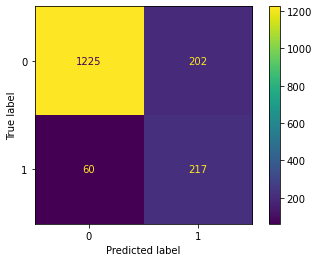

In [29]:
plot_confusion_matrix(grid_LR, X_test_w2v, y_test_w2v)

## Grid NB

In [30]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(X_train_w2v, y_train_w2v)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.713, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.646, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.659, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.674, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.688, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.714, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.663, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.672, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.681, total=   0.0s
[CV] 

[CV] ... var_smoothing=0.08111308307896872, score=0.747, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.785, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.740, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.779, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.782, total=   0.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.751, total=   0.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.784, total=   0.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.787, total=   0.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.772, total=   0.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.793, total=   0.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.749, total=   0.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.791, total=   0.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.787, total=   0.0s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .. var_smoothing=0.005336699231206307, score=0.774, total=   0.0s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.752, total=   0.0s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.794, total=   0.0s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.788, total=   0.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.776, total=   0.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.792, total=   0.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.752, total=   0.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.796, total=   0.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV]  var_smoothing=5.3366992312063123e-05, score=0.798, total=   0.0s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.788, total=   0.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.777, total=   0.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.793, total=   0.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.752, total=   0.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.798, total=   0.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.788, total=   0.0s
[CV] var_smoothing=3.511191734215127e-05 .............................
[CV] .

[CV] . var_smoothing=4.328761281083053e-06, score=0.752, total=   0.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.798, total=   0.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.788, total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=0.777, total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=0.793, total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=0.752, total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=0.798, total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  

[CV]  var_smoothing=3.5111917342151277e-07, score=0.752, total=   0.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.798, total=   0.0s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.788, total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV] . var_smoothing=2.848035868435799e-07, score=0.777, total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV] . var_smoothing=2.848035868435799e-07, score=0.793, total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV] . var_smoothing=2.848035868435799e-07, score=0.752, total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV] . var_smoothing=2.848035868435799e-07, score=0.798, total=   0.0s
[CV] var_smoothing=2.848035868435799e-07 .............................
[CV] .

[CV] . var_smoothing=2.848035868435799e-08, score=0.777, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] . var_smoothing=2.848035868435799e-08, score=0.793, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] . var_smoothing=2.848035868435799e-08, score=0.752, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] . var_smoothing=2.848035868435799e-08, score=0.798, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] . var_smoothing=2.848035868435799e-08, score=0.788, total=   0.0s
[CV] var_smoothing=2.310129700083158e-08 .............................
[CV] . var_smoothing=2.310129700083158e-08, score=0.777, total=   0.0s
[CV] var_smoothing=2.310129700083158e-08 .............................
[CV] . var_smoothing=2.310129700083158e-08, score=0.793, total=   0.0s
[CV] var_smoothing=2.310129700083158e-08 .............................
[CV] .

[CV] . var_smoothing=2.848035868435805e-09, score=0.798, total=   0.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.788, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] . var_smoothing=2.310129700083158e-09, score=0.777, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] . var_smoothing=2.310129700083158e-09, score=0.793, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] . var_smoothing=2.310129700083158e-09, score=0.752, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] . var_smoothing=2.310129700083158e-09, score=0.798, total=   0.0s
[CV] var_smoothing=2.310129700083158e-09 .............................
[CV] . var_smoothing=2.310129700083158e-09, score=0.788, total=   0.0s
[CV] var_smoothing=1.873817422860387e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.1s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [31]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(X_train_w2v, y_train_w2v)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(X_test_w2v)
print("complete.")

training...
complete.
predicting...
complete.


In [32]:
grid_NB_precision = precision_score(y_test_w2v, NB_test_preds)
grid_NB_recall = recall_score(y_test_w2v, NB_test_preds)
grid_NB_macro_f1_score = f1_score(y_test_w2v, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

w2v_metrics['Grid NB'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.64
Recall: 0.596
Macro F1 Score: 0.773


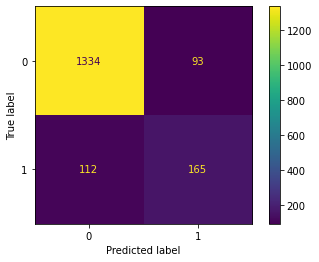

In [33]:
plot_confusion_matrix(grid_NB, X_test_w2v, y_test_w2v)

## Results

In [34]:
pd.options.display.float_format = '{:.4f}'.format

results = pd.DataFrame.from_dict(w2v_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\w2v_results.csv",
               index=True)
results

,precision,recall,macro_f1
Grid SVM,0.7085,0.5704,0.7844
Grid LR,0.5179,0.7834,0.7635
Grid NB,0.6395,0.5957,0.7727
